In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('cardio_train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import joblib


In [4]:
data = pd.read_csv('cardio_train.csv',sep=";")

In [5]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
data.drop("id",axis=1,inplace=True)


In [7]:
data['years'] = (data['age'] / 360).round().astype('int')

In [8]:
data["bmi"] = data["weight"] / (data["height"]/100)**2

In [9]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,51,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,56,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,49,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,49,23.011177


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
 12  years        70000 non-null  int32  
 13  bmi          70000 non-null  float64
dtypes: float64(2), int32(1), int64(11)
memory usage: 7.2 MB


In [11]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
years          0
bmi            0
dtype: int64

In [12]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,54.077900,27.556513
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.858852,6.091511
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000,3.471784
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,49.000000,23.875115
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,55.000000,26.374068
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,59.000000,30.222222
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,66.000000,298.666667


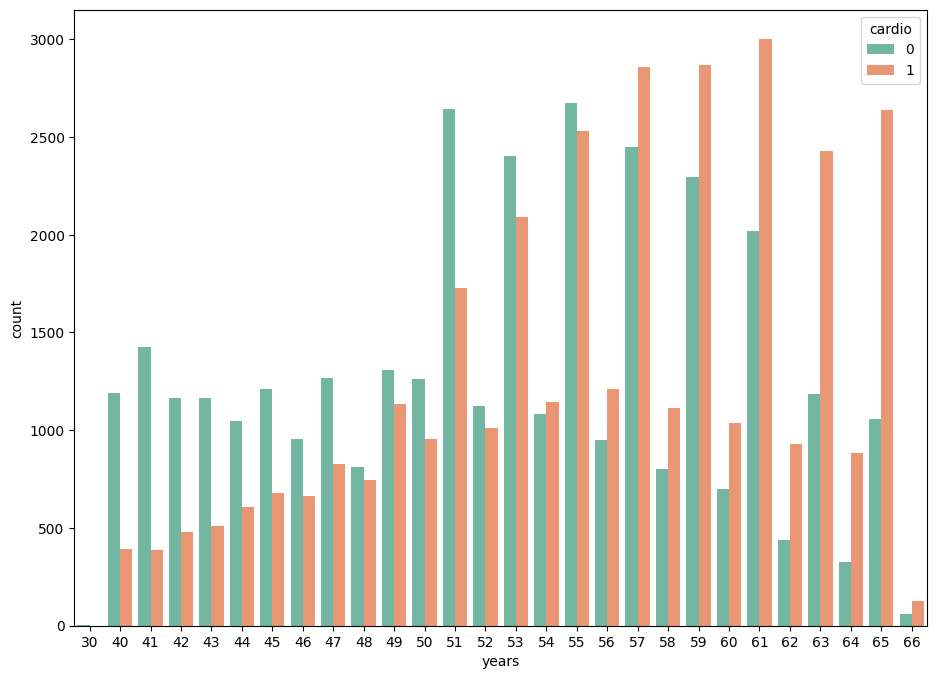

In [13]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='years', hue='cardio', data = data, palette="Set2");

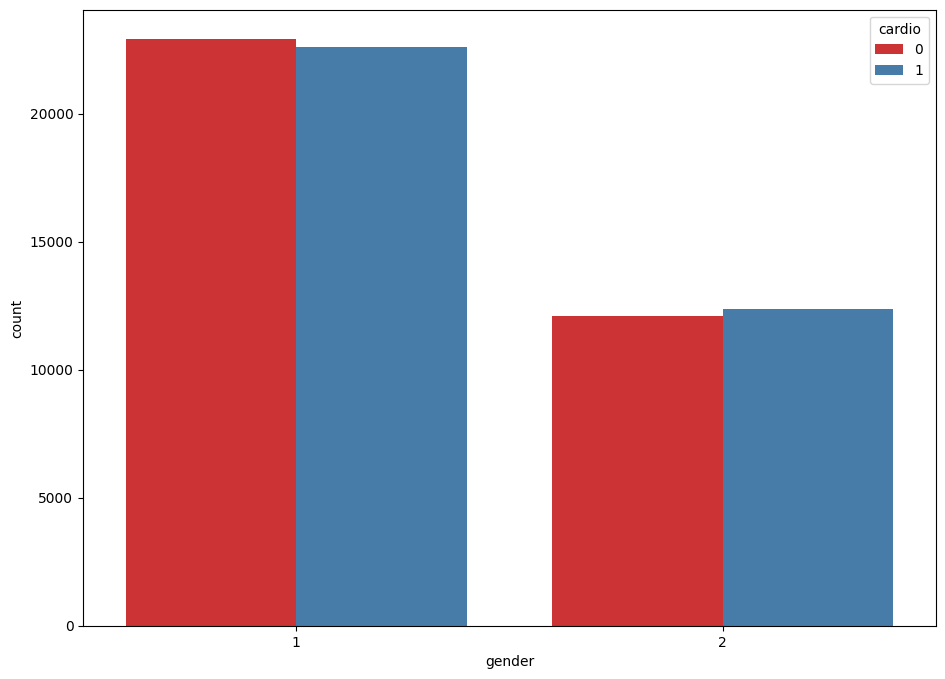

In [14]:
rcParams['figure.figsize'] = 11, 8
sns.countplot(x='gender', hue='cardio', data = data, palette="Set1");

In [15]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,51,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,56,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,49,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,49,23.011177


In [16]:
corr = data[['gender', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,gender,cardio
gender,1.000000,0.008109
cardio,0.008109,1.000000


In [17]:
corr = data[['height', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,height,cardio
height,1.000000,-0.010821
cardio,-0.010821,1.000000


In [18]:
corr = data[['weight', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,weight,cardio
weight,1.000000,0.181660
cardio,0.181660,1.000000


In [19]:
corr = data[['ap_hi', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,ap_hi,cardio
ap_hi,1.000000,0.054475
cardio,0.054475,1.000000


In [20]:
corr = data[['ap_lo', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,ap_lo,cardio
ap_lo,1.000000,0.065719
cardio,0.065719,1.000000


In [21]:
corr = data[['cholesterol', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,cholesterol,cardio
cholesterol,1.000000,0.221147
cardio,0.221147,1.000000


In [22]:
corr = data[['gluc', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,gluc,cardio
gluc,1.000000,0.089307
cardio,0.089307,1.000000


In [23]:
corr = data[['age', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,age,cardio
age,1.000000,0.238159
cardio,0.238159,1.000000


In [24]:
corr = data[['bmi', 'cardio']].corr()
corr.style.background_gradient(cmap='coolwarm')

,bmi,cardio
bmi,1.000000,0.165632
cardio,0.165632,1.000000


In [25]:
num = data["smoke"].value_counts("0")
num

0    0.911871
1    0.088129
Name: smoke, dtype: float64

In [26]:
num_ns = 70000 * 0.911871
num_s = 70000 * 0.088129

print(f"There are  {int(num_ns)}  Non-Smokers and  {int(num_s)}  Smokers in the data set.")


There are  63830  Non-Smokers and  6169  Smokers in the data set.


In [27]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'years', 'bmi'],
      dtype='object')

In [28]:
pearson_coef, p_value = stats.pearsonr(data['height'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is -0.010821058331005218  with a P-value of P = 0.004196298812995185


In [29]:
pearson_coef, p_value = stats.pearsonr(data['weight'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.18165956179862705  with a P-value of P = 0.0


In [30]:
pearson_coef, p_value = stats.pearsonr(data['ap_hi'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.05447505392686896  with a P-value of P = 3.6980921257189197e-47


In [31]:
pearson_coef, p_value = stats.pearsonr(data['ap_lo'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.06571869614919353  with a P-value of P = 7.424551291343928e-68


In [32]:
pearson_coef, p_value = stats.pearsonr(data['cholesterol'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.22114727391240444  with a P-value of P = 0.0


In [33]:
pearson_coef, p_value = stats.pearsonr(data['gluc'], data['cardio'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value); 

The Pearson Correlation Coefficient is 0.0893068873242996  with a P-value of P = 6.483042590649536e-124


In [34]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'years', 'bmi'],
      dtype='object')

In [35]:
column_names = ['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active','age', 'bmi','cardio']

In [36]:
data = data.reindex(columns=column_names)

In [37]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age,bmi,cardio
0,2,168,62.0,110,80,1,1,0,0,1,18393,21.967120,0
1,1,156,85.0,140,90,3,1,0,0,1,20228,34.927679,1
2,1,165,64.0,130,70,3,1,0,0,0,18857,23.507805,1
3,2,169,82.0,150,100,1,1,0,0,1,17623,28.710479,1
4,1,156,56.0,100,60,1,1,0,0,0,17474,23.011177,0


In [38]:
X = data.drop('cardio', axis=1)
y = data['cardio']

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [40]:
y_train.value_counts()

1    28048
0    27952
Name: cardio, dtype: int64

In [41]:
y_test.value_counts()

0    7069
1    6931
Name: cardio, dtype: int64

In [43]:
!pip install xgboost

     ------------------------------------ 125.4/125.4 MB 522.9 kB/s eta 0:00:00


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

In [45]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVC": SVC()

}

In [46]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------


c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuracy: 0.7135357142857143
Testing Accuracy: 0.7129285714285715
Testing Confusion Matrix: 
[[5299 1770]
 [2249 4682]]
Testing Recall: 0.6755157985860626
Testing Precesion: 0.7256664600123992
Testing F-1: 0.6996936411865801
Testing F-Beta: 0.7150493295458016
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.7786428571428572
Testing Accuracy: 0.68
Testing Confusion Matrix: 
[[4948 2121]
 [2359 4572]]
Testing Recall: 0.659645072861059
Testing Precesion: 0.6831017480950247
Testing F-1: 0.6711685261303583
Testing F-Beta: 0.6782778981099606
------------------------------
Training Model DT 
--------------
Training Accuracy: 0.9998035714285715
Testing Accuracy: 0.6329285714285714
Testing Confusion Matrix: 
[[4460 2609]
 [2530 4401]]
Testing Recall: 0.634973308324917
Testing Precesion: 0.6278174037089872
Testing F-1: 0.6313750806972241
Testing F-Beta: 0.6292356523977011
------------------------------
Training Model RF 
--------------
Training Accu

In [47]:
y_test

10840    0
56267    0
14849    0
62726    0
47180    0
        ..
29357    1
52488    0
9603     1
34949    0
25193    1
Name: cardio, Length: 14000, dtype: int64

In [48]:
y_pred = model.predict(x_test)

In [ ]:
pd.DataFrame(y_pred)